In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,RocCurveDisplay,roc_curve, auc, f1_score
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from imblearn.ensemble import RUSBoostClassifier
from sklearn import svm, tree
from sklearn.metrics import plot_confusion_matrix


In [66]:
PATHNAME = './creditcard.csv'
# PATHNAME = './diabetes.csv'
# PATHNAME = './breast_cancer.csv'

In [70]:
def loadData():
  df = pd.read_csv(PATHNAME).dropna()
  X = df.drop(df.columns.values[-1:],axis=1)
  y = df.drop(df.columns.values[:-1],axis=1)
  ul = np.unique(y)
  y = y.to_numpy()
  X = X.to_numpy()
  # print(type(y),y)
  for i in range(len(y)):
    if y[i] == ul[0]:
      y[i] = 0
    else:
      y[i] = 1
  y_minority = 0

  if(len(y[y==ul[0]])>len(y[y==ul[1]])):
    for i in range(len(y)):
      y[i] = 1 - y[i]  
  return X,y, y_minority

def loadSyntheticData(imb_rat):
  X,y = make_classification(n_samples=10000,n_features=4,n_classes=2,weights=[imb_rat,1-imb_rat],random_state=0)
  if imb_rat <= 0.5:
    return X,y,0
  else:
    return X,y,1

In [68]:
'''
  Analysing dataset
'''
# X,y,y_minority = loadSyntheticData()
X,y,y_minority = loadData()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
y_train = y_train.ravel()
y_test = y_test.ravel()
print(len(X_test[np.all([y_test==1],axis=0)])+len(X_train[np.all([y_train==1],axis=0)]))
print(len(X_test[np.all([y_test==0],axis=0)]))
print(len(X_test[np.all([y_test==1],axis=0)]))

print(len(X_train[np.all([y_train==0],axis=0)]))
print(len(X_train[np.all([y_train==1],axis=0)]))
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

284315
101
56861
391
227454
(227845, 30) (227845,) (56962, 30) (56962,)


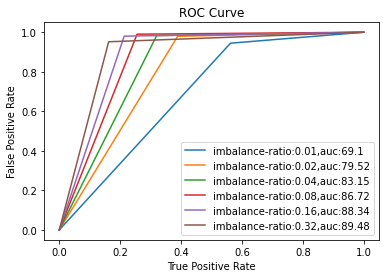

F1-score 0.9153069605822696
K-S Score KstestResult(statistic=0.018, pvalue=0.9023552779223781)


In [75]:
F1_list = []
auc_list = []
DATASET = False
for a in [0.01,0.02,0.04,0.08,0.16,0.32]:
    if not DATASET:
        X,y,y_minority = loadSyntheticData(a)
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
        y_train = y_train.ravel()
        y_test = y_test.ravel()

    clf = RUSBoostClassifier(base_estimator=tree.DecisionTreeClassifier(criterion='gini',max_depth=10),n_estimators=30,algorithm='SAMME.R',learning_rate=0.337)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    # plot_confusion_matrix(clf,X_test,y_test)
    # plt.show()  
    F1Score = f1_score(y_test,y_pred,average='weighted')
    F1_list.append(F1Score)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    aucsc = auc(fpr,tpr)
    auc_list.append(aucsc)
    plt.plot(fpr,tpr,label='imbalance-ratio:'+str(a)+',auc:'+str(int(10000*aucsc)/100))
    if DATASET:
        break
plt.title('ROC Curve')
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()
print("F1-score",F1Score)
from scipy.stats import ks_2samp
print("K-S Score",ks_2samp(y_test,y_pred))
# plt.plot([10,15,20,25,30],F1_list)
# plt.show()
# plt.plot([10,15,20,25,30],auc_list)
# plt.show()

In [94]:
F1_list = []
auc_list = []
DATASET = True
for a in [0.01,0.02,0.04,0.08,0.16,0.32]:
    if not DATASET:
        X,y,y_minority = loadSyntheticData(a)
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
        y_train = y_train.ravel()
        y_test = y_test.ravel()

    clf = RUSBoostClassifier(base_estimator=tree.DecisionTreeClassifier(criterion='gini',max_depth=10),n_estimators=30,algorithm='SAMME.R')
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    plot_confusion_matrix(clf,X_test,y_test)
    plt.show()  
    F1Score = f1_score(y_test,y_pred,average='weighted')
    F1_list.append(F1Score)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    aucsc = auc(fpr,tpr)
    auc_list.append(aucsc)
    plt.plot(fpr,tpr)
    if DATASET:
        break
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

print(auc_list[0])
print(F1_list[0])
# plt.plot([10,15,20,25,30],F1_list)
# plt.show()
# plt.plot([10,15,20,25,30],auc_list)
# plt.show()

KeyboardInterrupt: 

In [107]:
clf = RUSBoostClassifier(base_estimator=tree.DecisionTreeClassifier(),n_estimators=30,algorithm='SAMME',learning_rate=0.2)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
plot_confusion_matrix(clf,X_test,y_test)
plt.show()  
F1Score = f1_score(y_test,y_pred,average='weighted')
F1_list.append(F1Score)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
aucsc = auc(fpr,tpr)
plt.plot(fpr,tpr)
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()
print(clf.n_classes_)
print(F1Score)
print(aucsc)